<a href="https://colab.research.google.com/github/Shavedha/WDM_EXP3/blob/main/WDM_Ex_3_9th_March.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from collections import defaultdict
from itertools import combinations

# Function to generate candidate k-item sequences
def generate_candidates(dataset, k):
    candidate_count = defaultdict(int)

    for sequence in dataset:
        for itemset in combinations(sequence, k):
            candidate_count[itemset] += 1

    return candidate_count

# Function to perform GSP algorithm
def gsp(dataset, min_support):
    # Step 1: Initialize the frequent patterns dictionary
    frequent_patterns = defaultdict(int)

    # Step 2: Generate frequent 1-item sequences
    k = 1
    candidate_count = generate_candidates(dataset, k)

    # Step 3: Prune and update frequent patterns
    frequent_patterns.update({itemset: count for itemset, count in candidate_count.items() if count >= min_support})

    # Step 4: Generate frequent k-item sequences until no more can be generated
    while candidate_count:
        k += 1
        candidate_count = generate_candidates(dataset, k)

        # Prune and update frequent patterns
        frequent_patterns.update({itemset: count for itemset, count in candidate_count.items() if count >= min_support})

    return frequent_patterns

# Example dataset for each category
top_wear_data = [
    ["blouse", "t-shirt", "tank_top"],
    ["hoodie", "sweater", "top"],
    ["hoodie"],
    ["hoodie", "sweater"]

]
bottom_wear_data = [
    ["jeans", "trousers", "shorts"],
    ["leggings", "skirt", "chinos"],

]
party_wear_data = [
    ["Dress", "High Heels", "Clutch"],
    ["Suit", "Tie", "Leather Shoes", "Watch"],
    ["Cocktail Dress", "Heels", "Earrings"],
    ["Tuxedo", "Bow Tie", "Formal Shoes"],
    ["Gown", "Bracelet", "Sandals"],
    ["Party Shirt", "Jeans", "Casual Shoes"],
    ["Party Shirt", "Jeans"],

]
# Minimum support threshold
min_support = 2
# Perform GSP algorithm for each category
top_wear_result = gsp(top_wear_data, min_support)
bottom_wear_result = gsp(bottom_wear_data, min_support)
party_wear_result = gsp(party_wear_data, min_support)
# Output the frequent sequential patterns for each category
print("Frequent Sequential Patterns - Top Wear:")
if top_wear_result:
    for pattern, support in top_wear_result.items():
        print(f"Pattern: {pattern}, Support: {support}")
else:
    print("No frequent sequential patterns found in Top Wear.")
print("\nFrequent Sequential Patterns - Bottom Wear:")
if bottom_wear_result:
    for pattern, support in bottom_wear_result.items():
        print(f"Pattern: {pattern}, Support: {support}")
else:
    print("No frequent sequential patterns found in Bottom Wear.")
print("\nFrequent Sequential Patterns - Party Wear:")
if party_wear_result:
    for pattern, support in party_wear_result.items():
        print(f"Pattern: {pattern}, Support: {support}")
else:
    print("No frequent sequential patterns found in Party Wear.")

Frequent Sequential Patterns - Top Wear:
Pattern: ('hoodie',), Support: 3
Pattern: ('sweater',), Support: 2
Pattern: ('hoodie', 'sweater'), Support: 2

Frequent Sequential Patterns - Bottom Wear:
No frequent sequential patterns found in Bottom Wear.

Frequent Sequential Patterns - Party Wear:
Pattern: ('Party Shirt',), Support: 2
Pattern: ('Jeans',), Support: 2
Pattern: ('Party Shirt', 'Jeans'), Support: 2


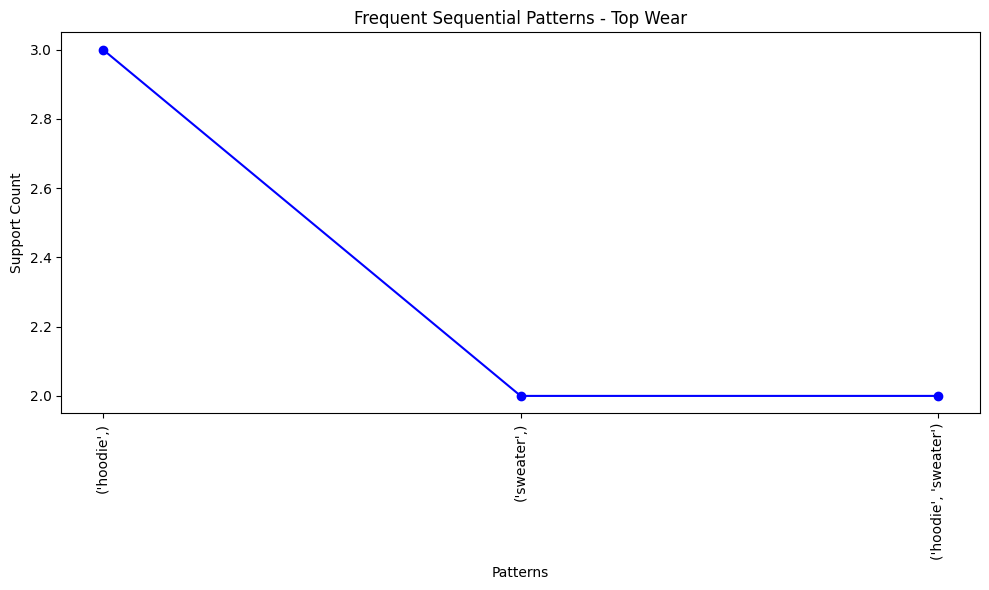

No frequent sequential patterns found in Bottom Wear.


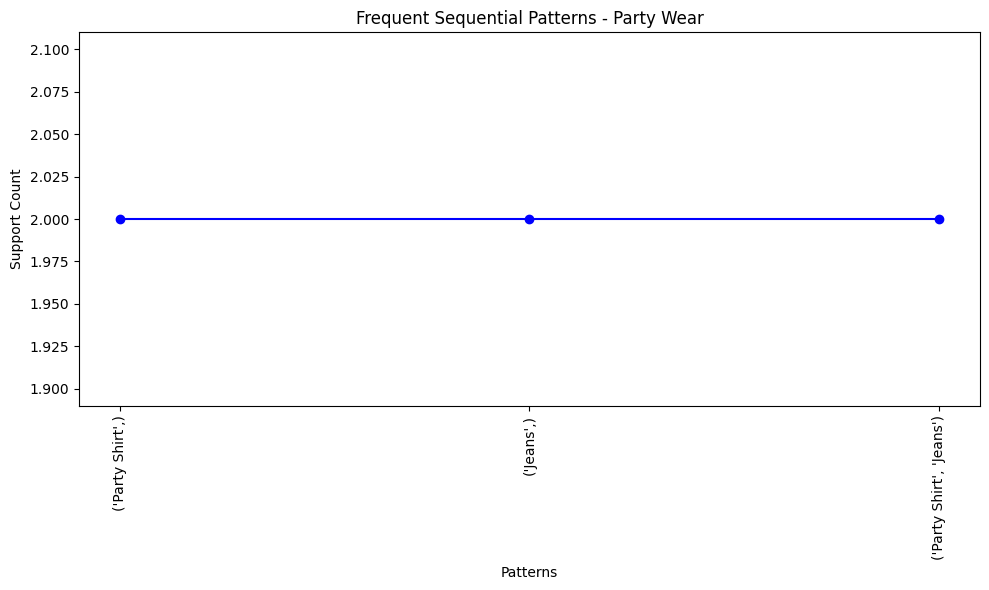

In [5]:
import matplotlib.pyplot as plt

# Function to visualize frequent sequential patterns with a line plot
def visualize_patterns_line(result, category):
    if result:
        patterns = list(result.keys())
        support = list(result.values())

        plt.figure(figsize=(10, 6))
        plt.plot([str(pattern) for pattern in patterns], support, marker='o', linestyle='-', color='blue')
        plt.xlabel('Patterns')
        plt.ylabel('Support Count')
        plt.title(f'Frequent Sequential Patterns - {category}')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print(f"No frequent sequential patterns found in {category}.")

# Visualize frequent sequential patterns for each category using a line plot
visualize_patterns_line(top_wear_result, 'Top Wear')
visualize_patterns_line(bottom_wear_result, 'Bottom Wear')
visualize_patterns_line(party_wear_result, 'Party Wear')